In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

Dimensions de x (100, 2)
Dimensions de y (100, 1)


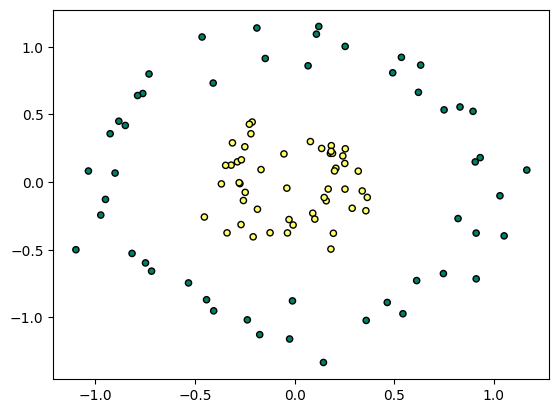

In [19]:
# X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

y = y.reshape(y.shape[0], 1)
# y = y.reshape((1, y.shape[0]))

print('Dimensions de x', X.shape)
print('Dimensions de y', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer', s=20, edgecolors='k')
plt.show()

In [20]:
def initialisation(X):
    m, n = X.shape
    # w = np.zeros((n, 1))
    # b = 0

    W = np.random.randn(n, 1)
    b = np.random.randn(1)

    return W, b

W, b = initialisation(X)
print('Dimensions de W', W.shape)
b

Dimensions de W (2, 1)


array([1.01969502])

In [21]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

A = model(X, W, b)

print('Dimensions de A', A.shape)

Dimensions de A (100, 1)


In [22]:
def log_loss(A, y):

    return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

log_loss(A, y)

0.9859994444981193

In [23]:
def gradients(A, X, y):

    dW = 1 / len(y) * X.T.dot(A - y)
    db = 1 / len(y) * np.sum(A - y)

    return (dW, db)

dW, db = gradients(A, X, y)

db.shape

()

In [24]:
def update(dW, db, W, b, learning_rate):

    W = W - learning_rate * dW
    b = b - learning_rate * db

    return (W, b)

In [25]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [26]:
from sklearn.metrics import accuracy_score

In [27]:


def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    
    # initialisation

    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(Loss)
    plt.show()

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    return (W, b)



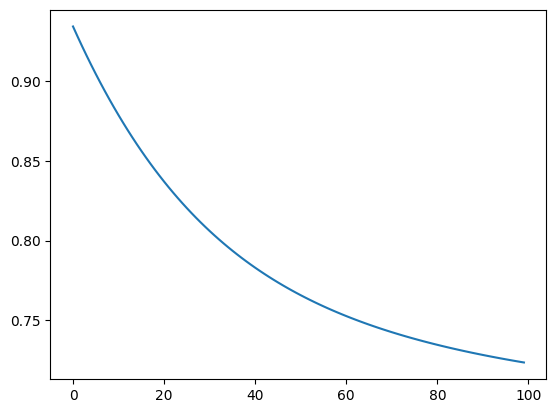

0.55


In [28]:
W, b = artificial_neuron(X, y)

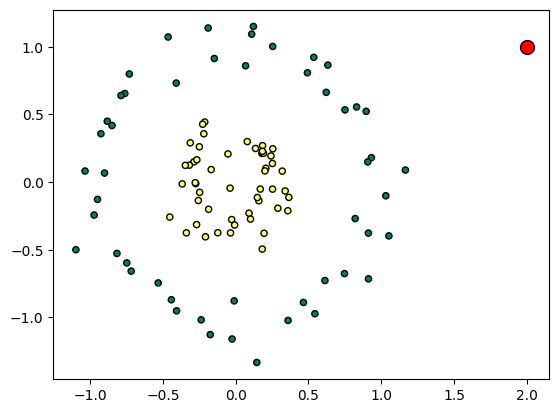

array([ True])

In [30]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = -(W[0] * x0 + b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer', s=20, edgecolors='k')
plt.scatter(new_plant[0], new_plant[1], c='r', s=100, edgecolors='k')
plt.plot(x0, x1)
plt.show()
predict(new_plant, W, b)